In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kritikseth/fruit-and-vegetable-image-recognition")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fruit-and-vegetable-image-recognition


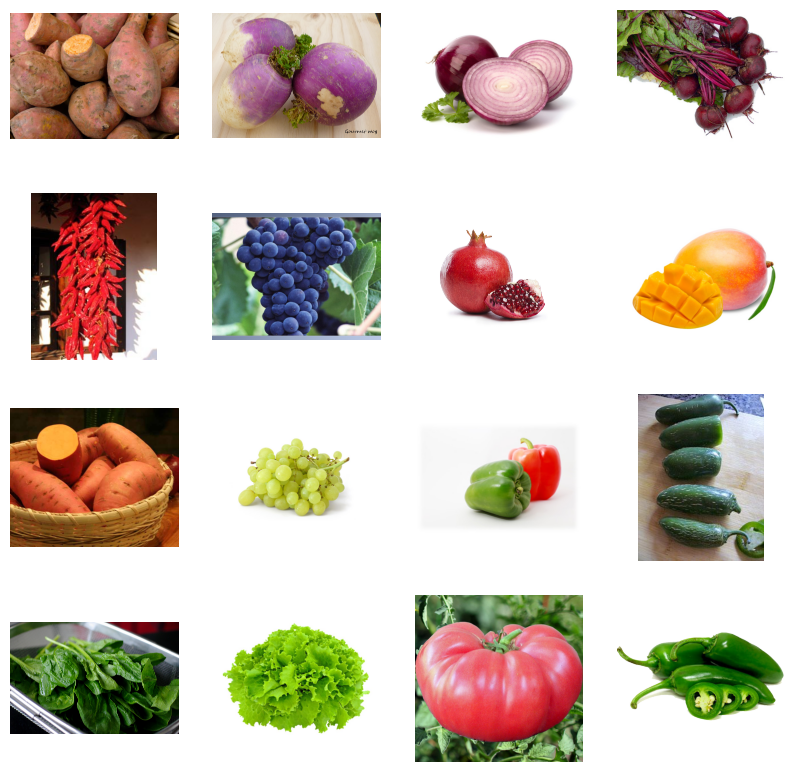

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to test directory
vis_dir = '/kaggle/input/fruit-and-vegetable-image-recognition/train'

# Get the list of all subdirectories (classes)
classes = os.listdir(vis_dir)

# Initialize an empty list to store file paths
image_paths = []

# Loop through each class folder and collect a few image paths
for cls in classes:
    class_dir = os.path.join(vis_dir, cls)
    images = os.listdir(class_dir)
    for img in images:
        image_paths.append(os.path.join(class_dir, img))

# Randomly select 16 images from the test set
random_images = random.sample(image_paths, 16)

# Set up a 4x4 grid for plotting
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

# Loop through the grid and add an image to each subplot
for i, ax in enumerate(axes.flat):
    img = mpimg.imread(random_images[i])
    ax.imshow(img)
    ax.axis('off')  # Hide axes

# Display the plot
plt.show()

In [ ]:
import os
from PIL import Image

# Define paths
input_dirs = {
    'train': '/kaggle/input/fruit-and-vegetable-image-recognition/train',
    'validation': '/kaggle/input/fruit-and-vegetable-image-recognition/validation',
    'test': '/kaggle/input/fruit-and-vegetable-image-recognition/test'
}
output_dir = '/kaggle/working/'

# Create output directory and subdirectories if they don't exist
for subset in input_dirs.keys():
    subset_dir = os.path.join(output_dir, subset)
    if not os.path.exists(subset_dir):
        os.makedirs(subset_dir)

def resize_and_save_image(input_path, output_path, size=(128, 128)):
    try:
        with Image.open(input_path) as img:
            # Handle images with Transparency in Palette mode
            if img.mode == 'P':
                img = img.convert('RGBA')
            # Convert image to RGB if it has an alpha channel or is Palette based
            if img.mode in ('RGBA', 'LA') or (img.mode == 'P' and 'transparency' in img.info):
                img = img.convert('RGB')
            img = img.resize(size, Image.LANCZOS)
            img.save(output_path, format='JPEG')
    except Exception as e:
        print(f"Error processing {input_path}: {e}")

def process_directory(input_directory, output_directory):
    for root, dirs, files in os.walk(input_directory):
        # Create the corresponding directory structure in the output directory
        relative_path = os.path.relpath(root, input_directory)
        output_path = os.path.join(output_directory, relative_path)
        if not os.path.exists(output_path):
            os.makedirs(output_path)

        # Process each image file
        for file_name in files:
            if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                input_file_path = os.path.join(root, file_name)
                output_file_path = os.path.join(output_path, file_name)
                resize_and_save_image(input_file_path, output_file_path)

# Process each directory separately
for subset, dir_path in input_dirs.items():
    process_directory(dir_path, os.path.join(output_dir, subset))

print("Resizing and saving images completed.")


Resizing and saving images completed.


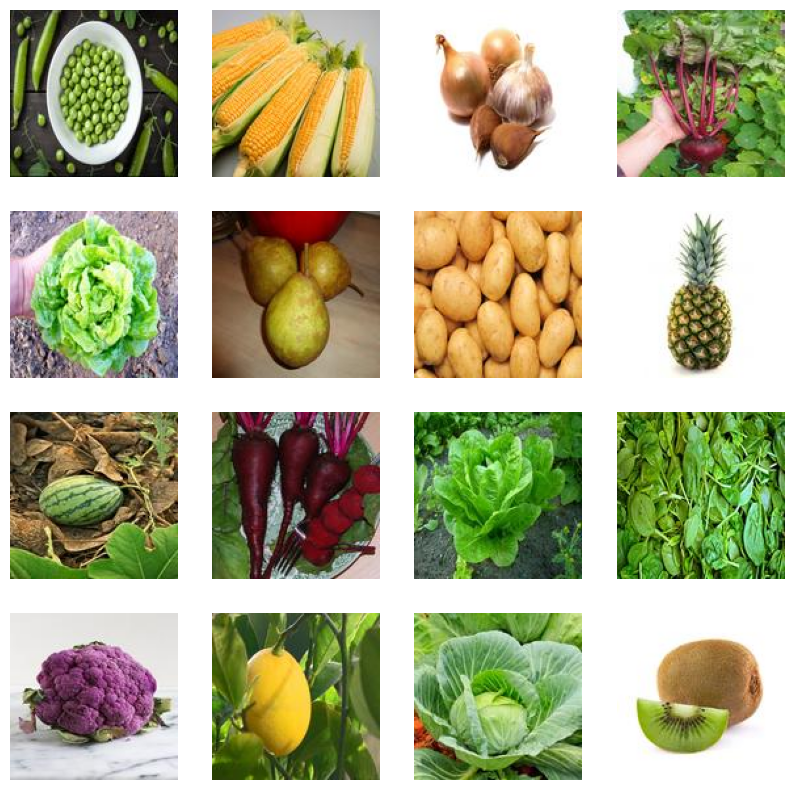

In [ ]:
# Define the path to  test directory
vis_dir = '/kaggle/working/train'

# Get the list of all subdirectories (classes)
classes = os.listdir(vis_dir)

# Initialize an empty list to store file paths
image_paths = []

# Loop through each class folder and collect a few image paths
for cls in classes:
    class_dir = os.path.join(vis_dir, cls)
    images = os.listdir(class_dir)
    for img in images:
        image_paths.append(os.path.join(class_dir, img))

# Randomly select 16 images from the test set
random_images = random.sample(image_paths, 16)

# Set up a 4x4 grid for plotting
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

# Loop through the grid and add an image to each subplot
for i, ax in enumerate(axes.flat):
    img = mpimg.imread(random_images[i])
    ax.imshow(img)
    ax.axis('off')  # Hide axes

# Display the plot
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Define paths
train_dir = '/kaggle/working/train'
test_dir = '/kaggle/working/test'

# Create an instance of the ImageDataGenerator with data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
)
# Create an instance of the ImageDataGenerator for the test set (usually without augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create the generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    seed= 777,
    target_size=(128, 128),  # Resize all images to 150x150 pixels
    batch_size=20,           # Number of images to yield per batch
    class_mode='categorical' # Since we have multiple classes
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    seed= 777,
    target_size=(128, 128),
    batch_size=20,
    class_mode='categorical'
)

Found 3115 images belonging to 36 classes.
Found 359 images belonging to 36 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Create a more complex CNN model with padding adjustments
model = models.Sequential([
    # First convolutional layer
    layers.Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),


    # Second convolutional layer
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),


    # Third convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),


    # Fourth convolutional layer
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Fifth convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),



    # Flattening the 3D output to 1D
    layers.Flatten(),

    # Fully connected (Dense) layer
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # Output layer with softmax activation for classification
    layers.Dense(36, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 32)       │        36,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 637,764 (2.43 MB)

 Trainable params: 635,652 (2.42 MB)

 Non-trainable params: 2,112 (8.25 KB)

In [ ]:

history = model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator,
    verbose=2)


Epoch 1/50
156/156 - 625s - 4s/step - accuracy: 0.1310 - loss: 3.2820 - val_accuracy: 0.0641 - val_loss: 3.8813
Epoch 2/50
156/156 - 619s - 4s/step - accuracy: 0.2421 - loss: 2.6545 - val_accuracy: 0.0696 - val_loss: 3.5293
Epoch 3/50
156/156 - 618s - 4s/step - accuracy: 0.3230 - loss: 2.3527 - val_accuracy: 0.3120 - val_loss: 2.4055
Epoch 4/50
156/156 - 607s - 4s/step - accuracy: 0.3653 - loss: 2.1931 - val_accuracy: 0.4067 - val_loss: 1.9121
Epoch 5/50
156/156 - 609s - 4s/step - accuracy: 0.4276 - loss: 1.9766 - val_accuracy: 0.6769 - val_loss: 1.1252
Epoch 6/50
156/156 - 627s - 4s/step - accuracy: 0.4716 - loss: 1.8226 - val_accuracy: 0.7075 - val_loss: 1.0104
Epoch 7/50
156/156 - 606s - 4s/step - accuracy: 0.4921 - loss: 1.7415 - val_accuracy: 0.6295 - val_loss: 1.2876
Epoch 8/50
156/156 - 604s - 4s/step - accuracy: 0.5387 - loss: 1.5885 - val_accuracy: 0.5877 - val_loss: 1.3608
Epoch 9/50
156/156 - 606s - 4s/step - accuracy: 0.5640 - loss: 1.4524 - val_accuracy: 0.8106 - val_loss:

In [ ]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Show the plots
plt.tight_layout()
plt.show()
